In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd



os.chdir(r'C:\Users\Shyam Adsul\SSPU 20-21\Data sets')

df = pd.read_csv('PRSA_Data_Shunyi.csv')


In [4]:
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi


In [5]:
def convert_to_date(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [6]:
df1 = pd.read_csv('PRSA_Data_Shunyi.csv', parse_dates = [['year', 'month', 'day', 'hour']],date_parser=convert_to_date, keep_date_col=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
df1['month']=pd.to_numeric(df1['month'])

In [9]:
print ("Rows     : " ,df1.shape[0])
print ("Columns  : " ,df1.shape[1])
print ("\nFeatures : \n" ,df1.columns.tolist())
print ("\nMissing values :  ", df1.isnull().any())
print ("\nUnique values :  \n",df1.nunique())

Rows     :  35064
Columns  :  19

Features : 
 ['year_month_day_hour', 'No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']

Missing values :   year_month_day_hour    False
No                     False
year                   False
month                  False
day                    False
hour                   False
PM2.5                   True
PM10                    True
SO2                     True
NO2                     True
CO                      True
O3                      True
TEMP                    True
PRES                    True
DEWP                    True
RAIN                    True
wd                      True
WSPM                    True
station                False
dtype: bool

Unique values :  
 year_month_day_hour    35064
No                     35064
year                       5
month                     12
day                       31
hour                      24
PM2.5         

<AxesSubplot:>

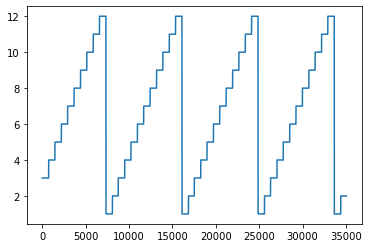

In [10]:
df.month.plot()

In [11]:
df1.describe()

,No,month,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,6.522930,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,3.448752,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,1.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,4.000000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,7.000000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,10.000000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,12.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [12]:
df2 = df1.set_index('year_month_day_hour')

In [13]:
df2.index

DatetimeIndex(['2013-03-01 00:00:00', '2013-03-01 01:00:00',
               '2013-03-01 02:00:00', '2013-03-01 03:00:00',
               '2013-03-01 04:00:00', '2013-03-01 05:00:00',
               '2013-03-01 06:00:00', '2013-03-01 07:00:00',
               '2013-03-01 08:00:00', '2013-03-01 09:00:00',
               ...
               '2017-02-28 14:00:00', '2017-02-28 15:00:00',
               '2017-02-28 16:00:00', '2017-02-28 17:00:00',
               '2017-02-28 18:00:00', '2017-02-28 19:00:00',
               '2017-02-28 20:00:00', '2017-02-28 21:00:00',
               '2017-02-28 22:00:00', '2017-02-28 23:00:00'],
              dtype='datetime64[ns]', name='year_month_day_hour', length=35064, freq=None)

In [14]:
df2.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [15]:
df2.loc['2013-03-01':'2013-03-05']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-03-05 19:00:00,116,2013,3,5,19,154.0,226.0,84.0,140.0,2200.0,61.0,7.3,1011.1,-5.1,0.0,NNE,1.3,Shunyi
2013-03-05 20:00:00,117,2013,3,5,20,193.0,234.0,87.0,145.0,2399.0,61.0,4.1,1011.4,-4.1,0.0,NNE,1.3,Shunyi
2013-03-05 21:00:00,118,2013,3,5,21,218.0,247.0,101.0,143.0,2799.0,61.0,5.0,1011.3,-5.1,0.0,N,1.5,Shunyi


In [16]:
df2.loc['2013':'2015']

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
year_month_day_hour,,,,,,,,,,,,,,,,,,
2013-03-01 00:00:00,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
2013-03-01 01:00:00,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2013-03-01 02:00:00,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
2013-03-01 03:00:00,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
2013-03-01 04:00:00,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-31 19:00:00,24860,2015,12,31,19,86.0,90.0,14.0,96.0,1700.0,3.0,-2.1,1027.1,-8.8,0.0,NaN,0.0,Shunyi
2015-12-31 20:00:00,24861,2015,12,31,20,133.0,136.0,21.0,95.0,2000.0,5.0,-1.7,1027.1,-8.7,0.0,SE,1.0,Shunyi
2015-12-31 21:00:00,24862,2015,12,31,21,167.0,171.0,26.0,95.0,2700.0,7.0,-1.9,1026.7,-8.6,0.0,N,1.6,Shunyi


<AxesSubplot:xlabel='year_month_day_hour'>

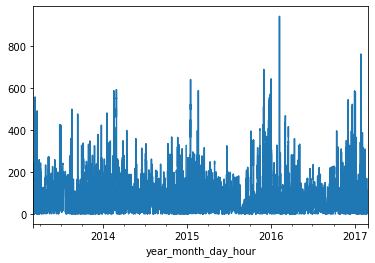

In [17]:
pm_data = df2['PM2.5']
pm_data.head()
pm_data.plot()

<AxesSubplot:xlabel='year_month_day_hour'>

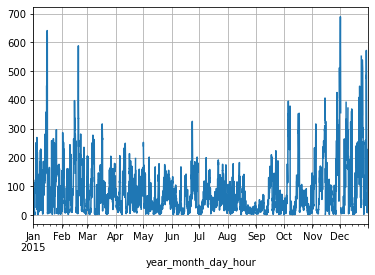

In [18]:
df2_2015=df2.loc['2015']
df2_2015=df2_2015['PM2.5']
df2_2015.plot(grid=True)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

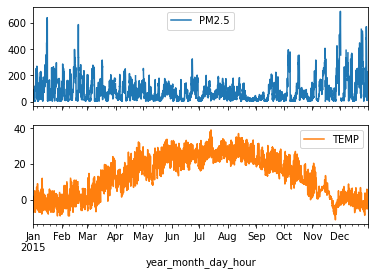

In [19]:
df2_2015=df2.loc['2015']
df2_2015=df2_2015[['PM2.5','TEMP']]
df2_2015.plot(subplots=True)

array([[<AxesSubplot:title={'center':'PM2.5'}>,
        <AxesSubplot:title={'center':'TEMP'}>]], dtype=object)

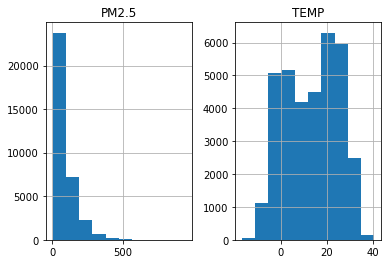

In [20]:
df2[['PM2.5','TEMP']].hist()

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

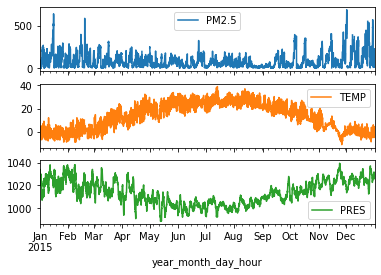

In [21]:
df2_2015=df2.loc['2015']
df2_2015=df2_2015[['PM2.5','TEMP','PRES']]
df2_2015.plot(subplots=True)

array([<AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>,
       <AxesSubplot:xlabel='year_month_day_hour'>], dtype=object)

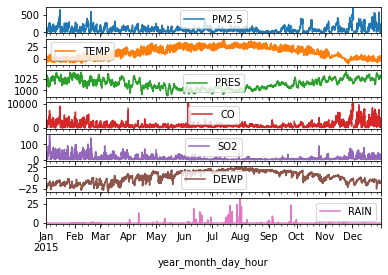

In [22]:
df2_2015=df2.loc['2015']
df2_2015=df2_2015[['PM2.5','TEMP','PRES','CO','SO2','DEWP','RAIN']]
df2_2015.plot(subplots=True)



In [23]:
df2_2015.head()

,PM2.5,TEMP,PRES,CO,SO2,DEWP,RAIN
year_month_day_hour,,,,,,,
2015-01-01 00:00:00,3.0,-2.0,1032.0,400.0,6.0,-23.9,0.0
2015-01-01 01:00:00,4.0,-4.0,1027.0,400.0,7.0,-24.9,0.0
2015-01-01 02:00:00,5.0,-4.0,1032.0,300.0,8.0,-24.9,0.0
2015-01-01 03:00:00,4.0,-4.0,1030.0,NaN,2.0,-24.9,0.0
2015-01-01 04:00:00,4.0,-4.0,1029.0,200.0,2.0,-24.9,0.0


In [24]:
df2_2015.isnull().sum()

PM2.5    124
TEMP      33
PRES      33
CO       313
SO2      198
DEWP      33
RAIN      33
dtype: int64

In [25]:
df2_2015['PM2.5'].fillna(df2_2015['PM2.5'].median(), inplace=True)

In [26]:
df2_2015['TEMP'].fillna(df2_2015['TEMP'].median(), inplace=True)
df2_2015['PRES'].fillna(df2_2015['PRES'].median(), inplace=True)
df2_2015['SO2'].fillna(df2_2015['SO2'].mean(), inplace=True)
df2_2015['CO'].fillna(df2_2015['CO'].median(), inplace=True)


In [72]:
import pmdarima as pm

model = pm.auto_arima(df2_2015['PM2.5'], 
                        m=12, seasonal=True,
                      start_p=1, start_q=1, max_order=4, test='adf',error_action='ignore',             
                      )

KeyboardInterrupt: 

In [56]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 8737
Model:             SARIMAX(3, 0, 0)x(2, 0, [1], 12)   Log Likelihood              -40472.548
Date:                              Sun, 14 Mar 2021   AIC                          80961.097
Time:                                      00:04:49   BIC                          81017.699
Sample:                                           0   HQIC                         80980.386
                                             - 8737                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.3844      1.458      2.321      0.020       0.527       6.242
ar.L1          1.0389      0.004    295.161      0.000       1.032       1.046
ar.L2         -0.1119      0.003    -31.991      0.000      -0.119      -0.105
ar.L3          0.0269      0.003      9.537      0.000       0.021       0.032
ar.S.L12       0.0507      0.353      0.143      0.886      -0.642       0.743
ar.S.L24       0.0300      0.010      3.147      0.002       0.011       0.049
ma.S.L12      -0.0663      0.354     -0.187      0.851      -0.761       0.628
sigma2       617.6533      2.426    254.592      0.000     612.898     622.408
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           1781836.04
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                            -1.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
df2_2015

,PM2.5,TEMP,PRES,CO,SO2,DEWP,RAIN
year_month_day_hour,,,,,,,
2015-01-01 00:00:00,3.0,-2.0,1032.0,400.0,6.0,-23.9,0.0
2015-01-01 01:00:00,4.0,-4.0,1027.0,400.0,7.0,-24.9,0.0
2015-01-01 02:00:00,5.0,-4.0,1032.0,300.0,8.0,-24.9,0.0
2015-01-01 03:00:00,4.0,-4.0,1030.0,800.0,2.0,-24.9,0.0
2015-01-01 04:00:00,4.0,-4.0,1029.0,200.0,2.0,-24.9,0.0
...,...,...,...,...,...,...,...
2015-12-31 19:00:00,86.0,-2.1,1027.1,1700.0,14.0,-8.8,0.0
2015-12-31 20:00:00,133.0,-1.7,1027.1,2000.0,21.0,-8.7,0.0
2015-12-31 21:00:00,167.0,-1.9,1026.7,2700.0,26.0,-8.6,0.0


In [58]:
train=df2_2015[(df2_2015.index.get_level_values(0) >= '2012-01-01') & (df2_2015.index.get_level_values(0) <= '2015-12-31')]
test=df2_2015[(df2_2015.index.get_level_values(0) > '2015-12-31')]

In [59]:
test

,PM2.5,TEMP,PRES,CO,SO2,DEWP,RAIN
year_month_day_hour,,,,,,,
2015-12-31 01:00:00,22.0,-2.6,1030.8,1900.0,2.0,-11.4,0.0
2015-12-31 02:00:00,17.0,-3.0,1031.1,400.0,22.0,-11.3,0.0
2015-12-31 03:00:00,15.0,-3.5,1031.2,400.0,7.0,-11.5,0.0
2015-12-31 04:00:00,12.0,-3.9,1031.2,300.0,4.0,-11.4,0.0
2015-12-31 05:00:00,13.0,-4.4,1030.7,200.0,4.0,-11.7,0.0
2015-12-31 06:00:00,11.0,-4.5,1030.7,300.0,9.0,-11.7,0.0
2015-12-31 07:00:00,9.0,-4.9,1030.9,400.0,11.0,-11.5,0.0
2015-12-31 08:00:00,17.0,-5.1,1031.1,800.0,11.0,-11.5,0.0
2015-12-31 09:00:00,25.0,-3.8,1031.4,900.0,13.0,-11.3,0.0


In [60]:
train.shape

(8737, 7)

In [61]:
model.fit(train['PM2.5'])

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

In [62]:
forecast=model.predict(n_periods=23, return_conf_int=True)

In [63]:
forecast

(array([20.13360387, 23.9112395 , 27.01435924, 29.47877947, 32.79176138,
        33.46293011, 35.27472975, 35.73545227, 37.51507043, 36.15315042,
        37.90425223, 38.67808414, 40.19501091, 41.6803849 , 43.20902371,
        45.07738609, 46.70204649, 48.14982915, 50.57617632, 52.77813597,
        52.79425607, 53.5515333 , 54.61997737]),
 array([[ -28.57666032,   68.84386806],
        [ -46.32879245,   94.15127145],
        [ -57.56831132,  111.59702981],
        [ -66.14416717,  125.10172611],
        [ -71.82130756,  137.40483033],
        [ -78.66411995,  145.58998016],
        [ -83.23843172,  153.78789122],
        [ -88.27029615,  159.74120069],
        [ -91.25651076,  166.28665161],
        [ -96.78154012,  169.08784095],
        [ -98.68628116,  174.49478561],
        [-101.13645556,  178.49262384],
        [-102.32305022,  182.71307204],
        [-103.22716526,  186.58793507],
        [-103.82877379,  190.24682122],
        [-103.86126772,  194.01603991],
        [-103.93504

In [64]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [65]:
forecast_df

,Prediction
year_month_day_hour,
2015-12-31 01:00:00,20.133604
2015-12-31 02:00:00,23.911239
2015-12-31 03:00:00,27.014359
2015-12-31 04:00:00,29.478779
2015-12-31 05:00:00,32.791761
2015-12-31 06:00:00,33.462930
2015-12-31 07:00:00,35.274730
2015-12-31 08:00:00,35.735452
2015-12-31 09:00:00,37.515070


<AxesSubplot:xlabel='year_month_day_hour'>

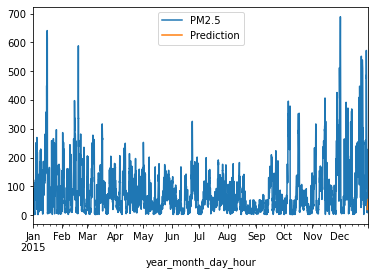

In [66]:
pd.concat([df2_2015['PM2.5'],forecast_df],axis=1).plot()

In [67]:
forecast1=model.predict(n_periods=8, return_conf_int=True)

In [68]:
forecast1

(array([20.13360387, 23.9112395 , 27.01435924, 29.47877947, 32.79176138,
        33.46293011, 35.27472975, 35.73545227]),
 array([[-28.57666032,  68.84386806],
        [-46.32879245,  94.15127145],
        [-57.56831132, 111.59702981],
        [-66.14416717, 125.10172611],
        [-71.82130756, 137.40483033],
        [-78.66411995, 145.58998016],
        [-83.23843172, 153.78789122],
        [-88.27029615, 159.74120069]]))

In [69]:
forecast_range=pd.date_range(start='2016-02-01', periods=8,freq='M')

In [70]:
forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

<AxesSubplot:>

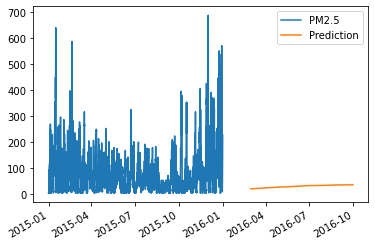

In [71]:
pd.concat([df2_2015['PM2.5'],forecast1_df],axis=1).plot()